In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp


## Funções

In [40]:
def sliding_window(signal, window_size:int, step_size:int):
    """
    Implementa uma janela de observação deslizante ao longo de um sinal.

    Parameters:
    ----------
    signal: np.array- ou list-like
        Sinal de entrada; pode ser uma lista ou um array numpy.

    window_size: int
        Tamanho da janela de observação, dado em elementos do sinal de entrada.

    step_size: int
        Valor do deslocamento da janela de observada, em elementos do sinal de
        entrada.

    Returns:
    --------
    Um gerador Python que retorna uma seção do sinal de entrada a cada iteração.

    """
    for i in range(0, len(signal) - window_size + 1, step_size):
        yield signal[i:i+window_size]



In [42]:
def calculate_euclidean_norms(df):
    """
    Calcula as normas euclidianas para os sinais do acelerômetro e giroscópio da coleira.
    
    Parameters:
    df (pandas.DataFrame): DataFrame contendo as colunas ANeck_[x,y,z] e GNeck_[x,y,z]
    
    Returns:
    tuple: (norma_acelerometro, norma_giroscopio)
    """
    # Cálculo da norma euclidiana do acelerômetro
    acc_norm = np.sqrt(
        df['ANeck_x']**2 + 
        df['ANeck_y']**2 + 
        df['ANeck_z']**2
    )
    
    # Cálculo da norma euclidiana do giroscópio
    gyro_norm = np.sqrt(
        df['GNeck_x']**2 + 
        df['GNeck_y']**2 + 
        df['GNeck_z']**2
    )
    
    return acc_norm, gyro_norm

In [43]:
# Função para visualizar os resultados
def plot_norms(t_sec, acc_norm, gyro_norm, sample_seconds=10):
    """
    Plota as normas euclidianas dos sinais.
    
    Parameters:
    t_sec (array): Vetor de tempo
    acc_norm (array): Norma do acelerômetro
    gyro_norm (array): Norma do giroscópio
    sample_seconds (int): Quantidade de segundos para mostrar
    """

    
    # Encontrar índices para o intervalo de tempo desejado
    idx = t_sec <= sample_seconds
    
    plt.figure(figsize=(15, 6))
    
    # Plot do acelerômetro
    plt.subplot(2, 1, 1)
    plt.plot(t_sec[idx], acc_norm[idx])
    plt.title('Norma Euclidiana do Acelerômetro')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Magnitude (m/s²)')
    plt.grid(True)
    
    # Plot do giroscópio
    plt.subplot(2, 1, 2)
    plt.plot(t_sec[idx], gyro_norm[idx])
    plt.title('Norma Euclidiana do Giroscópio')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Magnitude (rad/s)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [48]:
def apply_hann_window(signal, fs=100):
    """
    Aplica janelamento de Hann ao sinal com superposição de 50%.
    
    Parameters:
    ----------
    signal: np.array
        Sinal de entrada
    fs: int
        Frequência de amostragem em Hz
    
    Returns:
    --------
    list: Lista com as janelas processadas
    """
    # Calcula o tamanho da janela para 2 segundos
    window_size = 2 * fs  # 2 segundos * 100 Hz = 200 amostras
    step_size = window_size // 2  # 50% de superposição
    
    # Cria a janela de Hann
    hann_window = signal.windows.hann(window_size)  # Agora usando signal.windows
    
    # Aplica o janelamento
    windowed_signals = []
    for window in sliding_window(signal, window_size, step_size):
        if len(window) == window_size:  # Garante que a janela está completa
            windowed_signals.append(window * hann_window)
    
    return windowed_signals

In [45]:
def plot_windowed_signal(original_signal, windowed_signals, fs=100):
    """
    Plota o sinal original e algumas janelas processadas para comparação.
    
    Parameters:
    ----------
    original_signal: np.array
        Sinal original antes do janelamento
    windowed_signals: list
        Lista de janelas processadas
    fs: int
        Frequência de amostragem em Hz
    """
    import matplotlib.pyplot as plt
    
    # Criar vetor de tempo para o sinal original
    t_original = np.arange(len(original_signal)) / fs
    
    plt.figure(figsize=(15, 8))
    
    # Plotar sinal original
    plt.subplot(2, 1, 1)
    plt.plot(t_original, original_signal)
    plt.title('Sinal Original')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plotar algumas janelas processadas
    plt.subplot(2, 1, 2)
    t_window = np.arange(len(windowed_signals[0])) / fs
    
    # Plotar as primeiras 3 janelas
    for i, window in enumerate(windowed_signals[:3]):
        plt.plot(t_window + i, window, label=f'Janela {i+1}')
    
    plt.title('Janelas Processadas com Hann (50% superposição)')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Main

In [7]:
path    = "r:\Downloads\DogMoveData_csv_format\DogMoveData.csv"
#path2   = "r:\Downloads\DogMoveData_csv_format\DogInfo.csv"
df = pd.read_csv(path)
#df_info = pd.read_csv(path2)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Reyso\AppData\Local\Temp\ipykernel_3060\1562673651.py:1: SyntaxWarning: invalid escape sequence '\D'
  path    = "r:\Downloads\DogMoveData_csv_format\DogMoveData.csv"


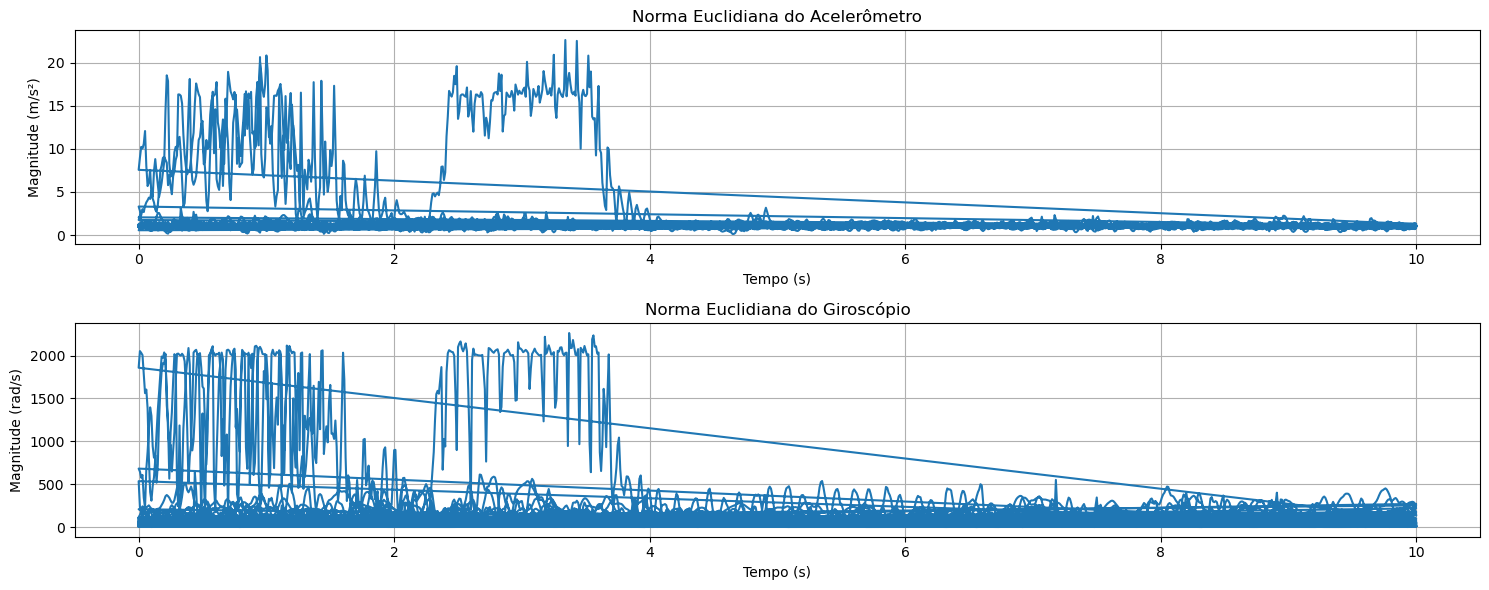

In [8]:
# Assumindo que seu DataFrame se chama 'df'
acc_norm, gyro_norm = calculate_euclidean_norms(df)

# Para visualizar os primeiros 10 segundos dos sinais
plot_norms(df['t_sec'], acc_norm, gyro_norm, sample_seconds=10)

In [11]:
# Calcular as normas euclidianas
acc_norm, gyro_norm = calculate_euclidean_norms(df)


In [49]:

# Aplicar janelamento nos sinais
acc_windowed = apply_hann_window(acc_norm)
gyro_windowed = apply_hann_window(gyro_norm)


AttributeError: 'Series' object has no attribute 'windows'

In [ ]:

# Visualizar os resultados
plot_windowed_signal(acc_norm, acc_windowed)
plot_windowed_signal(gyro_norm, gyro_windowed)